In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['legend.title_fontsize'] = 18

from matplotlib.animation import FuncAnimation

import multiprocessing as mp

In [2]:
coords = np.loadtxt('../../datasets/tsp_nodes/br5569_coords.csv', delimiter=',')

In [3]:
betas = np.loadtxt('data/br5568_states,node_count=2048,gamma=1,n_samples=16777216,.csv', delimiter=',', usecols=0)
costs = np.loadtxt('data/br5568_states,node_count=2048,gamma=1,n_samples=16777216,.csv', delimiter=',', usecols=1)
hcycles = np.loadtxt('data/br5568_states,node_count=2048,gamma=1,n_samples=16777216,.csv', delimiter=',', dtype=np.int, usecols=range(2,5572))

In [8]:
print(hcycles[0].shape)

(5570,)


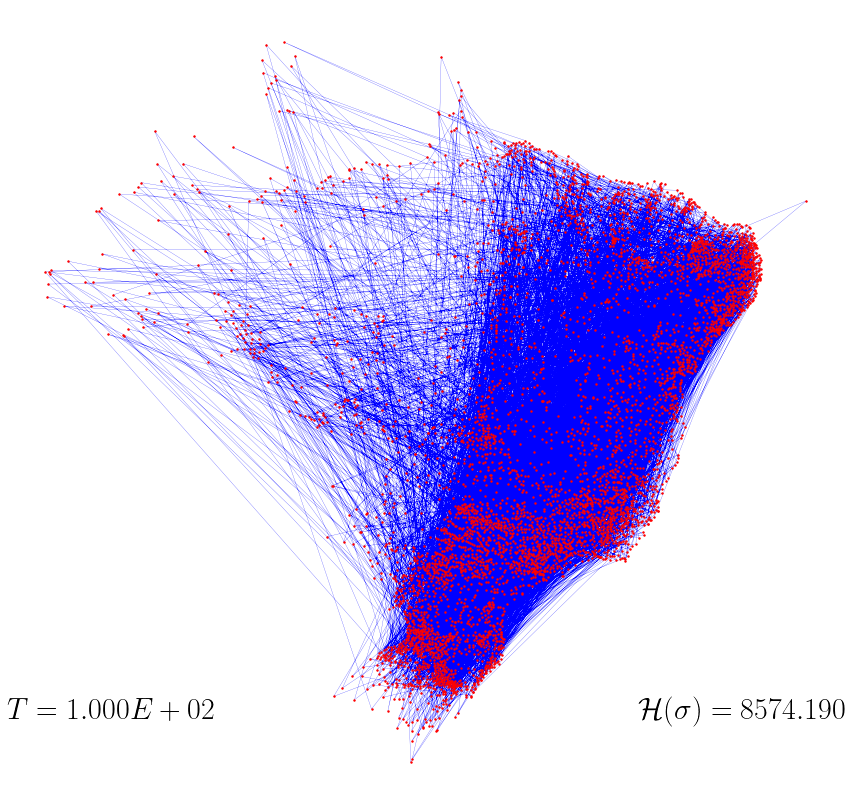

In [4]:
k = 0

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
    
ax.set_aspect('equal')
ax.axis("off")
    
ax.scatter(coords[:,0], coords[:,1], c='red',s=2, zorder=1)
ax.plot(coords[hcycles[k],0], coords[hcycles[k],1], c='blue', lw=0.2, zorder=0)
    
ax.annotate(r'$T = %.3E$'%(1.0/betas[k]), xy=(0, 0.1), xycoords=ax.transAxes, ha='left', fontsize=30)
ax.annotate(r'$\mathcal{H}(\sigma) = %.3f$'%(costs[k]), xy=(1, 0.1), xycoords=ax.transAxes, ha='right', fontsize=30)
    
plt.show()

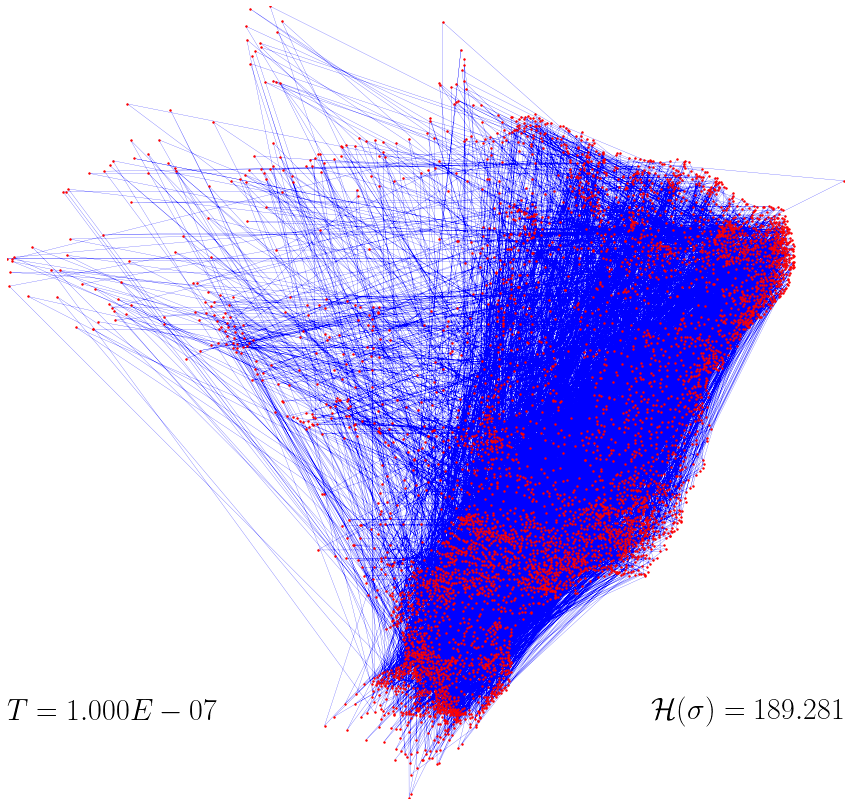

In [5]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111)    
ax.set_xlim(np.min(coords[:,0]), np.max(coords[:,0]))
ax.set_ylim(np.min(coords[:,1]), np.max(coords[:,1]))
ax.set_aspect('equal')
ax.axis("off")

sc = ax.scatter([], [], c='red',s=2, zorder=1)
line, = ax.plot([], [], c='blue', lw=0.2, zorder=0)

temp = ax.annotate('', xy=(0, 0.1), xycoords=ax.transAxes, ha='left', fontsize=30)
cost = ax.annotate('', xy=(1, 0.1), xycoords=ax.transAxes, ha='right', fontsize=30)

def init():
    sc.set_offsets(coords)
    line.set_data([], [])
    return line,sc

def animate(k):
    line.set_data(coords[hcycles[k],0], coords[hcycles[k],1])
    temp.set_text(r'$T = %.3E$'%(1.0/betas[k]))
    cost.set_text(r'$\mathcal{H}(\sigma) = %.3f$'%(costs[k]))
    return line, temp, cost,

anim = FuncAnimation(fig, animate, init_func=init, frames=betas.size, interval=33, blit=True)

anim.save('test.mp4')

In [ ]:
def worker(k):

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    
    ax.set_aspect('equal')
    ax.axis("off")
    
    ax.scatter(coords[:,0], coords[:,1], c='red',s=2, zorder=1)
    ax.plot(coords[hcycles[k],0], coords[hcycles[k],1], c='blue', lw=0.2, zorder=0)
    
    ax.annotate(r'$T = %.3E$'%(1.0/betas[k]), xy=(0, 0.1), xycoords=ax.transAxes, ha='left', fontsize=30)
    ax.annotate(r'$\mathcal{H}(\sigma) = %.3f$'%(costs[k]), xy=(1, 0.1), xycoords=ax.transAxes, ha='right', fontsize=30)

    fig.savefig('fig/%d.png'%(k), facecolor='white')
    
    plt.close(fig)

In [ ]:
with mp.Pool(processes=8) as pool:
    pool.map_async(worker, range(betas.size))
    pool.close()
    pool.join()

In [ ]:
for k in range(betas.size):

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    
    ax.set_aspect('equal')
    ax.axis("off")
    
    ax.scatter(coords[:,0], coords[:,1], c='red',s=2, zorder=1)
    ax.plot(coords[hcycles[k],0], coords[hcycles[k],1], c='blue', lw=0.2, zorder=0)
    
    ax.annotate(r'$T = %.3E$'%(1.0/betas[k]), xy=(0, 0.1), xycoords=ax.transAxes, ha='left', fontsize=30)
    ax.annotate(r'$\mathcal{H}(\sigma) = %.3f$'%(costs[k]), xy=(1, 0.1), xycoords=ax.transAxes, ha='right', fontsize=30)

    fig.savefig('fig/%d.png'%(k), facecolor='white')
    
    plt.close('all')